In [1]:
from bs4 import BeautifulSoup
import requests
import lxml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def fill_empty(entry):
    if entry == '' or entry == ' ' or entry == 'N/A':
        return '0'
    else:
        return entry
    
def string_to_int(entry):
     return int(entry.replace(',', ''))
        
def string_to_float(entry):
     return float(entry.replace(',', ''))

In [3]:
countries_source = requests.get('https://www.worldometers.info/coronavirus/#countries').text
countries_soup = BeautifulSoup(countries_source, 'lxml')
countries_table = countries_soup.find('div', class_='main_table_countries_div')

countries_table_columns = []
for column  in countries_table.find_all('th')[:-2]:
    countries_table_columns.append(column.text)

countries_initial_data = []
for data in countries_table.find_all('tr')[9:]:
    countries_initial_data.append(data.text)
    
countries_final_data = []
for i in range(len(countries_initial_data))[:-8]:
    countries_final_data.append(countries_initial_data[i].split('\n')[1:-1])
    
df = pd.DataFrame(countries_final_data, columns = countries_table_columns)

for column in countries_table_columns[:-2]:
    df[column] = df[column].apply(fill_empty)
df.drop(['#','1 Caseevery X ppl'], axis = 1, inplace = True)
df.to_csv('countries_data.csv', index = False)

In [5]:
df.columns = [ 'Country', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious', 'TotCases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'Population', 'Continent']

In [6]:
int_cols = ['TotalCases', 'NewCases', 'TotalDeaths',
           'NewDeaths', 'TotalRecovered', 'NewRecovered', 
            'ActiveCases', 'TotalTests','Serious','Population']

float_cols=['TotCases/1M pop', 'Deaths/1M pop','Tests/1M pop']

In [7]:
for column in int_cols:
     df[column] = df[column].apply(string_to_int)
for column in float_cols:
    df[column] = df[column].apply(string_to_float)

In [8]:
df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,24626441,0,408623,0,14551686,0,9666132,28553,74160.0,1231.0,287775215,866606.0,332071530,North America
1,India,10582647,0,152593,0,10228753,901,201301,8944,7627.0,110.0,187802827,135358.0,1387456647,Asia
2,Brazil,8512238,0,210328,0,7452047,0,849863,8318,39890.0,986.0,28600000,134026.0,213390822,South America
3,Russia,3612800,21734,66623,586,3002026,23262,544151,2300,24750.0,456.0,97300000,666580.0,145969038,Europe
4,UK,3433494,0,89860,0,1546575,0,1797059,3789,50431.0,1320.0,64676986,949980.0,68082466,Europe


In [9]:
df['Continent'].replace({'':'Others','Australia/Oceania':'Others'},inplace = True)

In [10]:
df['DeathPercent'] = df['TotalDeaths']/df['TotalCases']*100

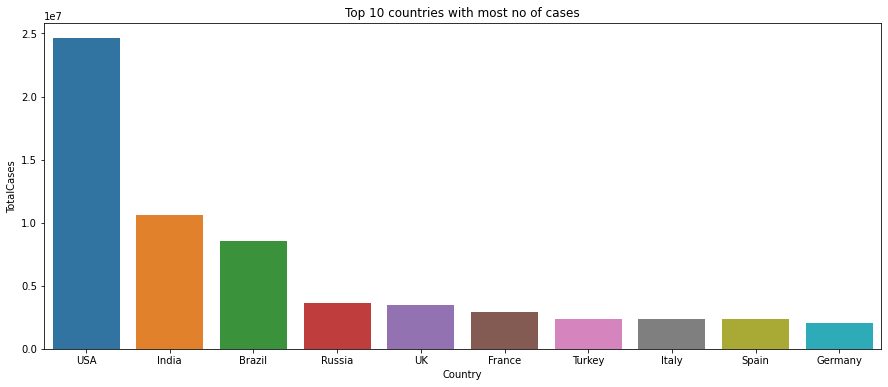

In [11]:
plt.figure(figsize=(15,6))
sns.barplot(x='Country', y='TotalCases', data = df.sort_values('TotalCases', ascending = False)[:10])
plt.title('Top 10 countries with most no of cases')
plt.show()

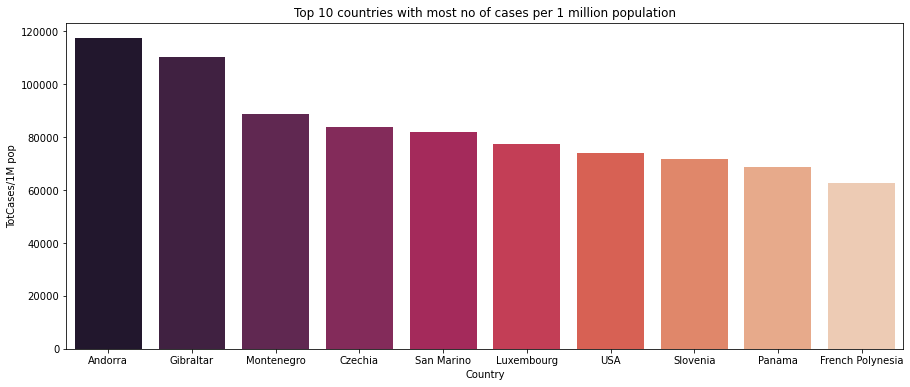

In [12]:
plt.figure(figsize=(15,6))
sns.barplot(x='Country', y='TotCases/1M pop', data = df.sort_values('TotCases/1M pop', ascending = False)[:10],palette = 'rocket')
plt.title('Top 10 countries with most no of cases per 1 million population')
plt.show()

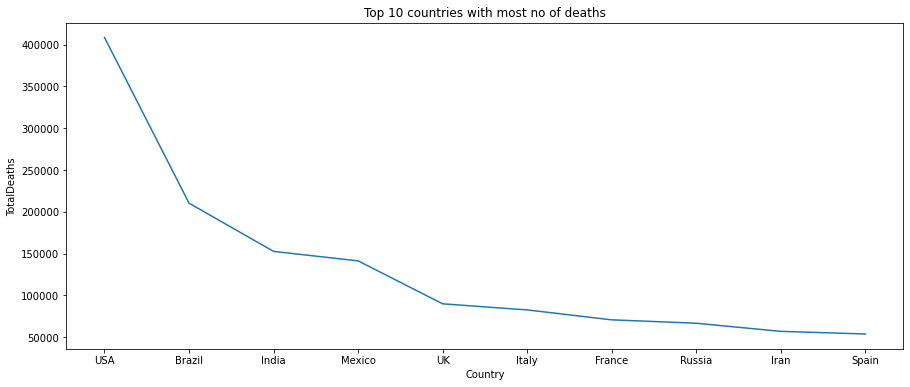

In [13]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Country', y='TotalDeaths', data = df.sort_values('TotalDeaths', ascending = False)[:10])
plt.title('Top 10 countries with most no of deaths')
plt.show()

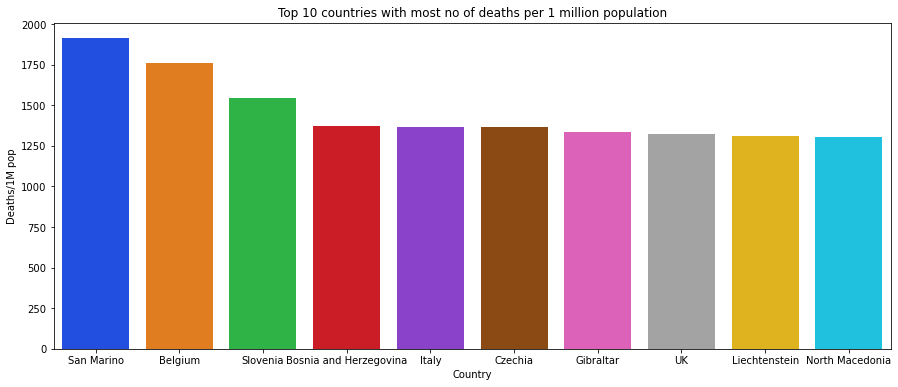

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(x='Country', y='Deaths/1M pop', data = df.sort_values('Deaths/1M pop', ascending = False)[:10], palette ='bright')
plt.title('Top 10 countries with most no of deaths per 1 million population')
plt.show()

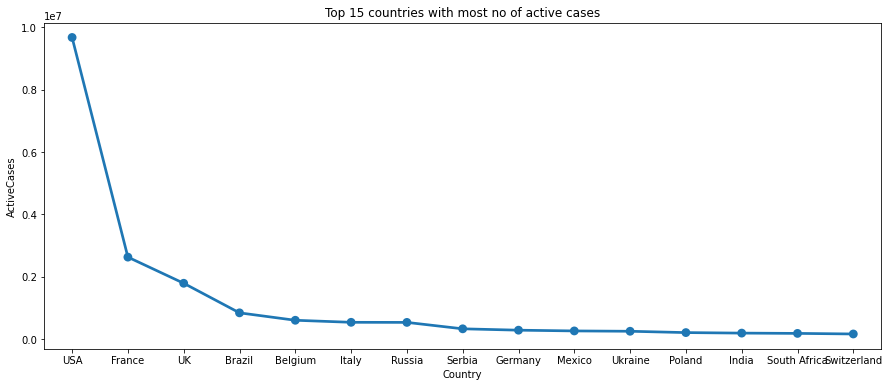

In [32]:
plt.figure(figsize=(15,6))
sns.pointplot(x='Country', y='ActiveCases', data = df.sort_values('ActiveCases', ascending = False)[:15])
plt.title('Top 15 countries with most no of active cases')
plt.show()

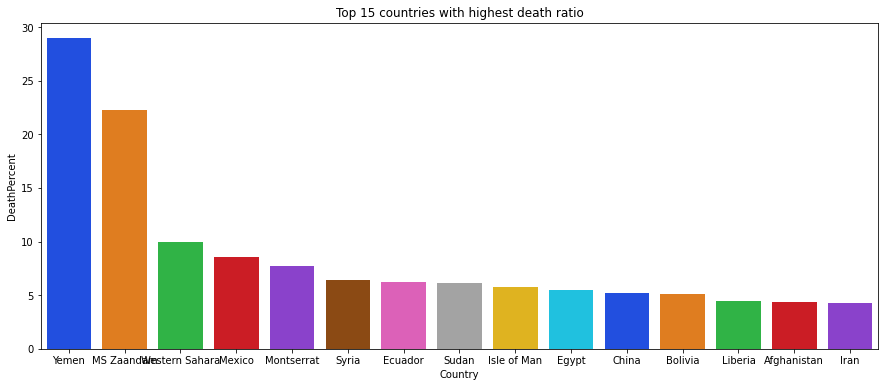

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x='Country', y='DeathPercent', data = df.sort_values('DeathPercent', ascending = False)[:15], palette ='bright')
plt.title('Top 15 countries with highest death ratio')
plt.show()

In [17]:
continents_df = df.groupby('Continent',as_index = False)[['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious', 'TotalTests',
       'Population']].sum()
continents_df['DeathPercent'] = continents_df['TotalDeaths']/continents_df['TotalCases']*100
continents_df

,Continent,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalTests,Population,DeathPercent
0,Africa,3300945,0,79736,0,2718039,0,503170,2699,27779271,1358032763,2.415551
1,Asia,22131619,10921,357892,188,20552140,9172,1221587,24190,525739113,4628138577,1.617107
2,Europe,27740115,36085,632147,1021,14912657,65537,8495214,29880,404662290,747880127,2.278819
3,North America,28118277,8947,589734,570,17261710,14247,10266833,36084,316183505,591644267,2.097333
4,Others,50372,9,1087,0,34500,11,14785,21,14064321,42565114,2.157945
5,South America,14711264,1550,389984,44,13019580,790,1301700,19136,61972729,432711748,2.650921


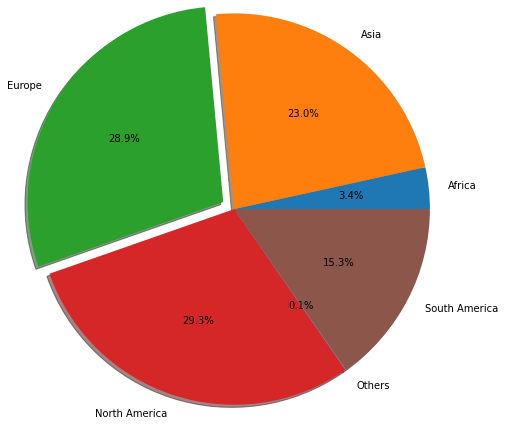

In [24]:
plt.figure(figsize=(15,6))
plt.pie(x=continents_df['TotalCases'], labels = continents_df['Continent'], radius=1.5,autopct='%1.1f%%',explode = (0, 0, 0.1, 0, 0, 0), shadow=True)
plt.show()

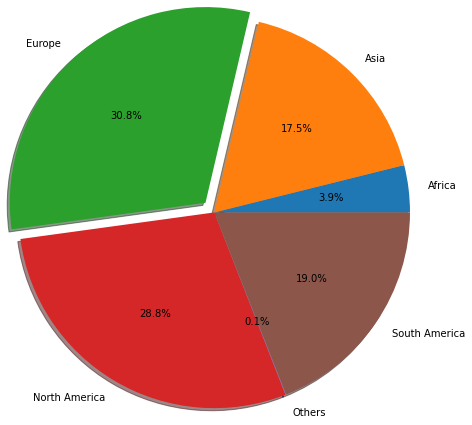

In [19]:
plt.figure(figsize=(15,6))
plt.pie(x=continents_df['TotalDeaths'], labels = continents_df['Continent'], radius=1.5,autopct='%1.1f%%',explode = (0, 0, 0.1, 0, 0, 0), shadow=True)
plt.show()

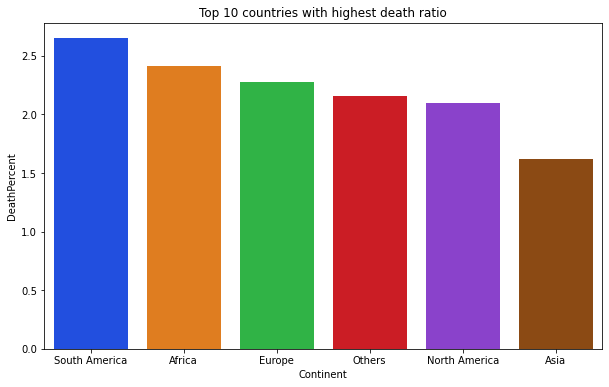

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='Continent', y='DeathPercent', data = continents_df.sort_values('DeathPercent', ascending= False), palette ='bright')
plt.title('Top 10 countries with highest death ratio')
plt.show()